# Binary Classification Using K-NN - Data Scaling

We created a synthetic dataset that consists of datapoints from two classes (class 0 and 1).

We intend to investigate the impact of data scaling on the performance of the K-NN classifier.

## Note: Data Scaling
- Minkowski: Scale & Normalize the data during preprocessing
- Mahalanobis: No need to Scale & Normalize the data during preprocessing

# Create a Synthetic Dataset

(200, 2)
(250, 2)


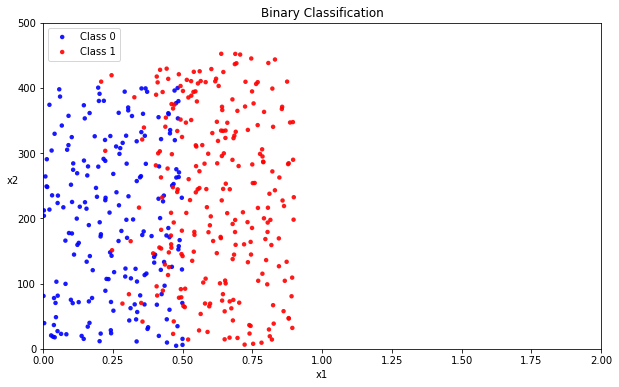

In [1]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(43)

m0 = 200  # no. of training examples for class 0


# Generate class 0 data points randomly from a uniform distribution
#    Here a & b are 2 dimensions for each data (feature) point
a = 0.5 *np.random.rand(m0,1)
b = 2 + a + 400*np.random.rand(m0,1)


# Concatenate the 2 dimensions of each feature to create the data matrix for class 0 
X0 = np.concatenate((a, b), axis=1)

# Create the target vector for class 0 (target is coded with zeros)
X0_target = np.zeros((m0,), dtype=np.int).reshape(-1, 1)

print(X0.shape)


m1 = 200  # no. of training examples for class 1


# Generate class 1 data points randomly from a uniform distribution
#    Here c & d are 2 dimensions for each data (feature) point
c = 0.4 + 0.5 *np.random.rand(m1,1)
d = 2 + c + 450*np.random.rand(m1,1)

# Concatenate the 2 dimensions of each feature to create the data matrix for class 1
X1a = np.concatenate((c, d), axis=1)


# Add 50 more training examples for class 1

e = 0.2 + 0.5 *np.random.rand(50,1)
f = 23 + e + 400*np.random.rand(50,1)
X1b = np.concatenate((e, f), axis=1)

# Create the target vector for class 1 (target is coded with ones)
X1_target = np.ones((m1+50,), dtype=np.int).reshape(-1, 1)


# All training examples for class 1
X1 = np.append(X1a, X1b, axis=0)
print(X1.shape)


# All training examples for class 0 and 1
X = np.append(X0, X1, axis=0)

# All target values for class 0 & 1
y = np.concatenate((X0_target, X1_target), axis=0)



# Draw a scatter plot
fig = plt.figure(figsize=(10, 6))
plt.scatter(X0[:, 0], X0[:, 1],alpha=0.9, c="blue", edgecolors='none', s=20, label="Class 0")
plt.scatter(X1[:, 0], X1[:, 1],alpha=0.9, c="red", edgecolors='none', s=20, label="Class 1")
plt.xlim(0,2)
plt.ylim(0,500)
plt.title("Binary Classification")
plt.legend(loc=2)
plt.xlabel("x1")
plt.ylabel("x2", rotation=0)
plt.show()


# Feature Scaling

Feature scaling is required when we use the Minkowski distance metric.

These techniques scale the features along their respective dimensions as well as normalize the data to center it around the mean.

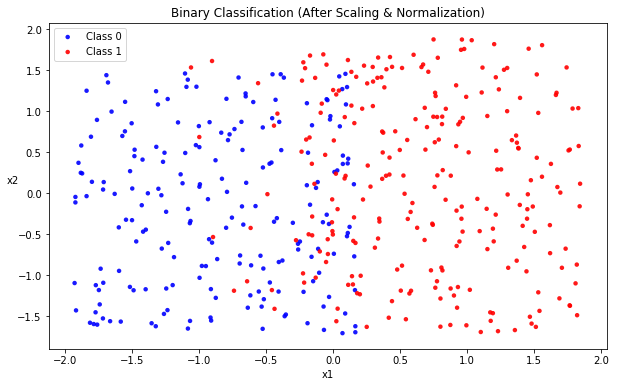

In [3]:
# Two techniques for scaling the data matrix

# Technique 1
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler().fit(X)
# X = scaler.transform(X)


# Technique 2
from sklearn.preprocessing import scale
X = scale(X)


# Get the datapoints from each class to plot them
X0_scaled = X[0:200, :]
X1_scaled = X[200:, :]

# Draw a scatter plot
fig = plt.figure(figsize=(10, 6))
plt.scatter(X0_scaled[:, 0], X0_scaled[:, 1],alpha=0.9, c="blue", edgecolors='none', s=20, label="Class 0")
plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1],alpha=0.9, c="red", edgecolors='none', s=20, label="Class 1")
# plt.xlim(0,2)
# plt.ylim(0,500)
plt.title("Binary Classification (After Scaling & Normalization)")
plt.legend(loc=2)
plt.xlabel("x1")
plt.ylabel("x2", rotation=0)
plt.show()

# Create Test and Train Dataset

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(360, 2)
(90, 2)
(360, 1)
(90, 1)


## Create the K-NN Model & Vary K

We will create the K-NN model and fit the training data on the model.

### Choose optimum K

We determine the optimum K by evaluating the K-NN model for various values of K. 

The K-NN model is evaluated by computing performance measure. There are various performamce measures for classification problems.

The sklearn KNeighborsClassifier uses, by default, "accuracy" as the performance measure. In a skewed dataset, accuracy doesn't provide a good estimate of the performance of the model. We will have to use confusion matrix, precision, recall, f1 score, etc.

But for now, let's use KNeighborsClassifier's default accuracy score function to evalute the model's performance for various values of K.


In [7]:
# import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Set the the range of K 
neighbors = np.arange(1,50)

# Two arrays to store training and test accuracies
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    
    # The "score" function returns the mean accuracy on the given train/test data and labels.
    # Note that "accuracy" may not be a good performance measure in a skewed data set
    # Thus, we need to do hyperparameter tuning by using better performance measures (e.g., f1 score, presision, recall)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 
    

/Users/hasan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


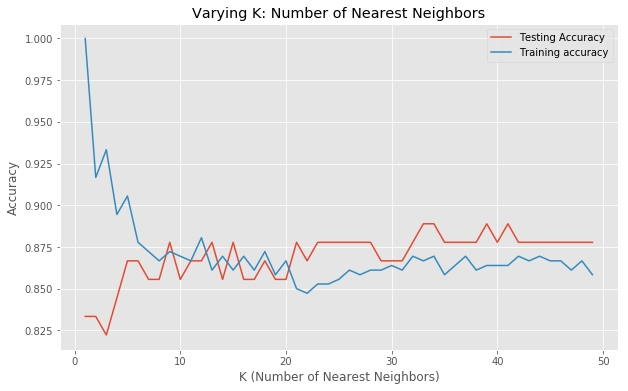

In [8]:

import matplotlib.pyplot as plt

plt.style.use('ggplot')
fig = plt.figure(figsize=(10, 6))
plt.title('Varying K: Number of Nearest Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('K (Number of Nearest Neighbors)')
plt.ylabel('Accuracy')
plt.show()

# Determine the Opimum K 

From the above diagram, find the the value of K that gives maximum accuracy on the test data.

## Model Selection: Hyperparameter Tunining


A K-NN model is defined by a set of parameters: nearest neighbors (K), distance metric (p), etc. These are called hyperparameters.

We need to select the best model based on the optimal values of these hyperparameters. This process is called hyperparameter tuning.

The best way to do hyperparameter tuning is to use cross-validation.

We will use Scikit-Learn’s GridSearchCV to search the combinations of hyperparameter values that provide best performance.

We need to tell which hyperparameters we want the GridSearchCV to experiment with, and what values to try out. It will evaluate all the possible combinations of hyperparameter values, using cross-validation. 


## Important:

The GridSearchCV takes an argument to define the scoring metric (performance measure). 

See the list of possible scoring functions:
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

For multiclass classification, we may use "f1_micro" scoring function. The f1_micro function is the average of the F1 score of each class with weighting depending on the average parameter.

In the binary classification, f1 score function can be used. We may also use the precision, recall, roc_auc functions.



In [9]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

# The param_grid tells Scikit-Learn to first evaluate all 50 × 2 = 100 combinations of 
#   n_neighbors and p hyperparameter values specified in the dict
param_grid = {'n_neighbors': np.arange(1,37, 2), 'p': [1, 2, 5,  10, 20, 30, 50, 100], 'weights': ["uniform", "distance"]}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, param_grid, scoring='f1', cv=3)
knn_cv.fit(X_train, y_train)

print("Best Score: %f" % knn_cv.best_score_)
print("Optimal Hyperparameter Values: ", knn_cv.best_params_)

/Users/hasan/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hasan/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hasan/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hasan/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversi

Best Score: 0.888728
Optimal Hyperparameter Values:  {'p': 2, 'n_neighbors': 31, 'weights': 'uniform'}


/Users/hasan/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hasan/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hasan/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hasan/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversi

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(weights="uniform", algorithm='auto', n_neighbors=31, p=2)
knn.fit(X_train, y_train) 

/Users/hasan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=31, p=2,
           weights='uniform')

## Evaluate Model Performance 

Evaluate the model's performance using cross-validation. 

Use Scikit-Learn's cross_val_score function. 

Note that the "scoring" argument should be set based on the type of classification (binary/multiclass).

In [12]:
from sklearn.model_selection import cross_val_score

# Scoring Parameter for Classification:
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# Note: For a skewed data set "accuracy" might not be a good choice for scoring
scores = cross_val_score(knn, X_train, y_train, scoring='f1', cv=3)
print(scores)

print("F1 Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.9        0.88721805 0.87878788]
F1 Score: 0.89 (+/- 0.02)


/Users/hasan/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hasan/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hasan/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


## Evalute The Model Using Confusion Matrix


We use the cross_val_predict() function to performs cross-validation, 

However, unlike cross_val_score, it doesn't return the evaluation scores.

Instead it returns the predictions made on each test fold. 

This means that we get a clean prediction for each instance in the training set.

By “clean” we mean that the prediction is made by a model that never saw the data during training).

In [14]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


y_train_pred = cross_val_predict(knn, X_train, y_train, cv=3)

confusion_matrix(y_train, y_train_pred)

/Users/hasan/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:753: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hasan/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:753: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/hasan/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:753: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


array([[135,  25],
       [ 20, 180]])

# Precision, Recall & F1 Score

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_train, y_train_pred) 
print("Precision = %f" % precision)

recall = recall_score(y_train, y_train_pred)
print("Recall = %f" % recall)


f1 = f1_score(y_train, y_train_pred)
print("F1 Score = %f" % f1)

Precision = 0.878049
Recall = 0.900000
F1 Score = 0.888889


# Evaluate The Model Using Test Data

The KNeighborsClassifier model has a default "score" function that computes the accuracy of the model.

Often times the accuracy is not a good measure.

We also compute the other performance measures, such as the confusion matrix, precision, recall, and the F1 score for the test data.

## Confusion Matrix for Test Data

In [16]:
# The accuracy of the model
score = knn.score(X_test, y_test)
print("Accuracy: %f" % score)


# No. of Correct Predictions
y_test_predicted = knn.predict(X_test)
print("\nNo. of correct predictions (Test): %d/%d" % (np.sum(y_test_predicted == y_test), len(y_test)))



# Confusion Matrix
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test, y_test_predicted))

Accuracy: 0.866667

No. of correct predictions (Test): 4120/90

Confusion Matrix (Test Data):
 [[33  7]
 [ 5 45]]


## Precision, Recall & F1 Score for Test Data

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score


precision = precision_score(y_test, y_test_predicted) 
print("Precision = %f" % precision)

recall = recall_score(y_test, y_test_predicted)
print("Recall = %f" % recall)


f1 = f1_score(y_test, y_test_predicted)
print("F1 Score = %f" % f1)


Precision = 0.865385
Recall = 0.900000
F1 Score = 0.882353
